In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

data =pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


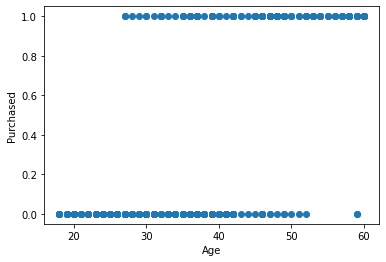

In [3]:
plt.scatter(data['Age'], data['Purchased'])
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

X_train, X_test,y_train,y_test=train_test_split(data["Age"],data["Purchased"],test_size=0.2)

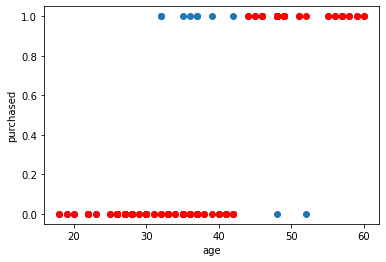

Accuracy = 0.875


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1).ravel())

y_pred_sk = model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test,y_pred_sk,c="red")

plt.xlabel("age")
plt.ylabel("purchased")
plt.show()

print(f"Accuracy = {model.score(X_test.values.reshape(-1, 1),y_test.values.reshape(-1, 1))}")

In [5]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sk).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  50
False Positives:  2
False Negatives:  8
True Positives:  20


In [6]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 87.50%:


In [7]:
Precision = tp/(tp+fp)
print("Precision {:0.2f}".format(Precision))

Precision 0.91


In [8]:
Recall = tp/(tp+fn)
print("Recall {:0.2f}".format(Recall))

Recall 0.71


In [9]:
err = (fp + fn)/(tp + tn + fn + fp)
print("Error rate {:0.2f}".format(err))

Error rate 0.12
